In [3]:
import numpy as np
class SimpleLinearRegiession1:
    def __init__(self):
        """初始化模型"""
        self.a_=None
        self.b_=None
    
    def fit(selft,x_train,y_train):
        """根据训练数据集x_train,y_train训练模型"""
        assert x_train.ndim==1,\
            "s"
        assert len(x_train)==len(y_train),\
            "t"
        x_mean=np.mean(x_train)
        y_mean=np.mean(y_train)
        num=0.0
        d=0.0
        for x,y in zip(x_train,y_train):
            num+=(x-x_mean) * (y-y_mean)
            d+=(x-x_mean)**2
        self.a_=num/d
        self.b_=y_mean-self.a_*x_mean
        return self
    
    def predict(self,x_predict):
        """给定待遇测数据x_predict，返回表示x_predict的结果向量"""
        assert x_predict.ndim==1, "s"
        assert self.a_ is not None and self.b_ is not None,"m"
        return np.array([self._predict(x) for x in x_predict])
    
    def _predict(self,x_single):
        """给定单个待遇测数据x_single，返回x_single的预测结果"""
        return self.a_*x_single+self.b_
    
    def __repr(self):
        return "SimpleLinearRegression1()"

In [8]:
class SimpleLinearRegiession2:
    def __init__(self):
        """初始化模型"""
        self.a_=None
        self.b_=None
        
    def fit(selft,x_train,y_train):
        """根据训练数据集x_train,y_train训练模型"""
        assert x_train.ndim==1,\
            "s"
        assert len(x_train)==len(y_train),\
            "t"
        x_mean=np.mean(x_train)
        y_mean=np.mean(y_train)
        
        num=(x_train-x_mean).dot(y_train-y_mean)
        d=(x_train-x_mean).dot(x_train-x_mean)
        self.a_=num/d
        self.b_=y_mean-self.a_*x_mean
        return self
        
    def predict(self,x_predict):
        """给定待遇测数据x_predict，返回表示x_predict的结果向量"""
        assert x_predict.ndim==1, "s"
        assert self.a_ is not None and self.b_ is not None,"m"
        return np.array([self._predict(x) for x in x_predict])
    
    def _predict(self,x_single):
        """给定单个待遇测数据x_single，返回x_single的预测结果"""
        return self.a_*x_single+self.b_
    
    def __repr(self):
        return "SimpleLinearRegression2()"

In [10]:
reg2=SimpleLinearRegression2()
y=np.array([1.,3.,2.,3.,5.])
x=np.array([1.,2.,3.,4.,5.])
reg2.fit(x,y)
reg2.a_

NameError: name 'SimpleLinearRegression2' is not defined

In [11]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [12]:
boston =datasets.load_boston()

In [13]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [17]:
x=boston.data[:,5]#只使用房间数量特征
x.shape

(506,)

In [18]:
y=boston.target

<function matplotlib.pyplot.show(*args, **kw)>

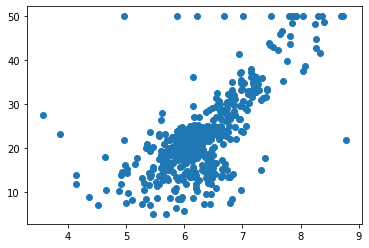

In [19]:
plt.scatter(x,y)
plt.show

In [20]:
np.max(y)

50.0

In [21]:
x=x[y<50.0]
y=y[y<50.0]

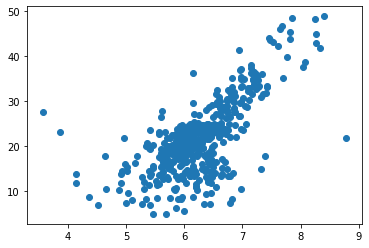

In [22]:
plt.scatter(x,y)

### R Square

In [2]:
from sklearn import datasets
boston=datasets.load_boston()
X=boston.data
y=boston.target
X=X[y<50.0]
y=y[y<50.0]

In [3]:
X.shape

(490, 13)

In [4]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=666)

In [5]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_reg=LinearRegression()

In [13]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lin_reg.coef_

array([-1.20354261e-01,  3.64423279e-02, -3.61493155e-02,  5.12978140e-02,
       -1.15775825e+01,  3.42740062e+00, -2.32311760e-02, -1.19487594e+00,
        2.60101728e-01, -1.40219119e-02, -8.35430488e-01,  7.80472852e-03,
       -3.80923751e-01])

In [15]:
lin_reg.intercept_

34.117399723229845

In [16]:
lin_reg.score(X_test,y_test)

0.8129794056212809

### KNN Regressor

In [19]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
knn_reg=KNeighborsRegressor()

In [22]:
knn_reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [23]:
knn_reg.score(X_test,y_test)

0.5865412198300899

In [25]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid=[
    {
        "weights":['uniform'],
        "n_neighbors":[i for i in range(1,11)]
    },
    {
        "weights":["distance"],
        "n_neighbors":[i for i in range(1,11)],
        "p":[i for i in range(1,6)]
    }
]

In [30]:
knn_reg=KNeighborsRegressor()

In [33]:
grid_search=GridSearchCV(knn_reg,param_grid,n_jobs=-1,verbose=1)

In [34]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['uniform']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [35]:
grid_search.best_params_

{'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

In [37]:
grid_search.best_score_

0.6168866269682803

In [38]:
grid_search.best_estimator_.score(X_test,y_test)

0.7079429845379058

In [40]:
import numpy as np
np.argsort(lin_reg.coef_)

array([ 4,  7, 10, 12,  0,  2,  6,  9, 11,  1,  3,  8,  5])